### 分析Random Forests

In [ ]:
%%capture
%pip install mglearn

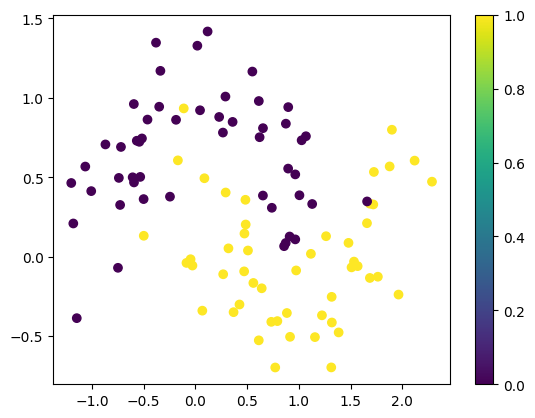

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #參考說明1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis') #參考說明2
plt.colorbar()
plt.show()

### 說明1
make_moons 資料集生成說明
這行程式碼使用 scikit-learn 的 make_moons() 函數來生成一個半月形(moon-shaped)的二分類資料集，各參數說明如下：

- **n_samples=100:**

    - 生成 100 個樣本點

- **noise=0.25:**

    - 加入 0.25 的高斯噪聲
    - 數值越大，數據點的分布越分散
    - 數值越小，數據點越接近完美的半月形狀

- **random_state=3:**

    - 設定隨機種子為 3
    - 確保每次運行時生成相同的隨機數據
- **回傳值:**

    - X: 特徵矩陣，包含所有樣本點的座標
    - y: 標籤數組，包含每個樣本的類別標籤(0 或 1)

這個數據集常用於測試和展示分類演算法的效果。生成的數據呈現兩個交錯的半月形，適合用來`測試非線性分類問題。`

### 說明2

1. `plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')`
   - `X[:, 0]`: 取 X 矩陣的第一列，作為 x 軸座標
   - `X[:, 1]`: 取 X 矩陣的第二列，作為 y 軸座標
   - `c=y`: 根據標籤 y 的值來設定點的顏色
   - `cmap='viridis'`: 使用 'viridis' 色彩映射方案

2. `plt.colorbar()`
   - 在圖表旁添加顏色條
   - 顯示顏色與標籤值的對應關係
   - 幫助解讀不同顏色代表的類別

3. `plt.show()`
   - 顯示繪製好的圖表
   - 如果在 Jupyter Notebook 中執行，會直接在 cell 下方顯示圖形
   - 如果在一般 Python 腳本中執行，會彈出視窗顯示圖形

最終效果：
- 會產生一個散點圖
- 每個點的位置由 X 矩陣中的兩個特徵決定
- 不同類別的點會以不同顏色顯示
- 右側會有顏色條標示類別對應的顏色

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2) #說明3
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

### 說明3
這行程式碼使用了scikit-learn的RandomForestClassifier類別來建立一個隨機森林分類模型，具體參數說明如下：

- **n_estimators=5**：設定隨機森林中決策樹的數量為5棵。
- **random_state=2**：設定隨機種子以確保模型訓練結果的一致性，通常用於重現結果。
這個模型會用於分類任務，並且可以通過調整n_estimators來改善模型的表現。

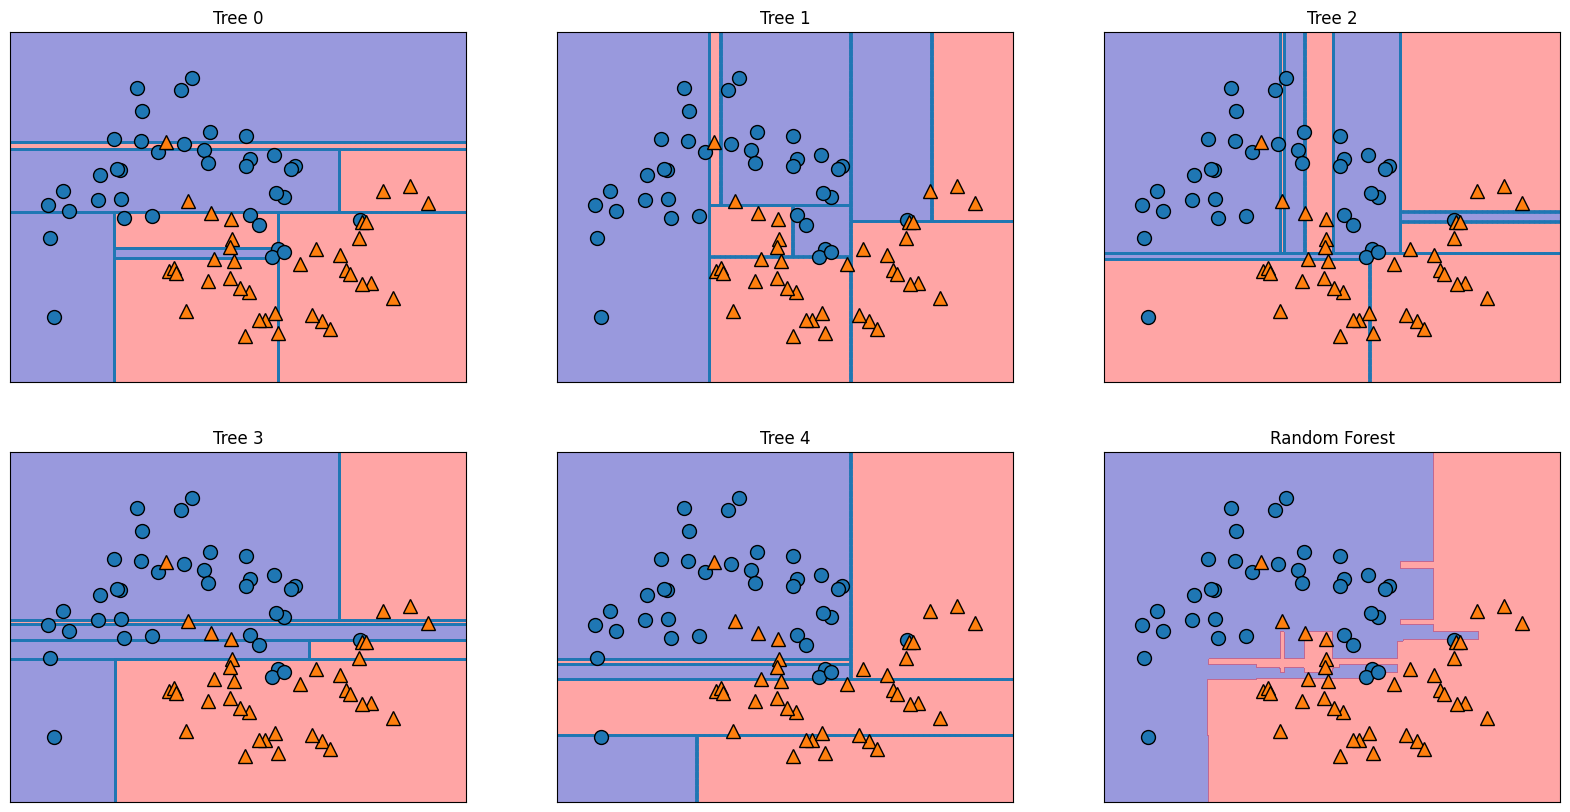

In [ ]:
#讓我們將每棵樹學到的決策邊界以及森林做出的整體預測視覺化
import mglearn

#請參考說明4
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train)

這段程式碼的目的是將隨機森林中每一棵決策樹學習到的決策邊界，以及整個森林模型最終做出的整體預測邊界進行視覺化。

- **import mglearn**  
匯入 mglearn 函式庫。這個函式庫包含了一些用於機器學習視覺化和教學的輔助工具。

- **fig, axes = plt.subplots(2, 3, figsize=(20, 10))**

    - 使用 matplotlib.pyplot (通常匯入為 plt) 的 subplots 函數來建立一個圖形 (fig) 和一組子圖 (axes)。

    - 2, 3 表示建立一個 2 列 3 行的子圖網格，總共會有 6 個子圖。
    - figsize=(20, 10) 設定整個圖形的大小為寬 20 英吋、高 10 英吋。

- **for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_))**

    - 這是一個迴圈，用來遍歷隨機森林模型 (forest) 中的每一棵決策樹 (tree)。
    - forest.estimators_ 是一個列表，包含了組成這個隨機森林的所有獨立決策樹模型物件。在這個例子中，因為前面設定 n_estimators=5，所以這裡會有 5 棵樹。
    - axes.ravel() 將 2x3 的子圖陣列 (axes) 攤平成一個一維陣列，方便依序存取每個子圖。
    - zip(axes.ravel(), forest.estimators_) 將子圖陣列和決策樹列表配對，每次迴圈取出一個子圖 (ax) 和對應的一棵樹 (tree)。

    - enumerate(...) 為迴圈加上計數器 i，從 0 開始 (代表第一棵樹)。

- **ax.set_title("Tree {}".format(i))**

    - 設定目前子圖 (ax) 的標題，顯示為 "Tree 0", "Tree 1", ..., "Tree 4"。

- **mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)**

    - 使用 mglearn 提供的 plot_tree_partition 函數。
    - 這個函數會在指定的子圖 (ax) 上，視覺化單一決策樹 (tree) 在訓練資料 (X_train, y_train) 上學習到的決策邊界分割情況。它會畫出樹如何將特徵空間分割成不同的區域。

- **mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)**

    - 使用 mglearn 提供的 plot_2d_separator 函數。
    - 這個函數用來視覺化整個隨機森林模型 (forest) 的最終決策邊界。
    - X_train 是用來定義繪圖範圍的資料。
    - fill=True 表示用顏色填充不同預測類別的區域。
    - ax=axes[-1, -1] 指定將這個圖畫在 2x3 網格中的最後一個子圖上 (即第二列第三個)。
    - alpha=.4 設定填充顏色的透明度為 0.4。

- **axes[-1, -1].set_title("Random Forest")**

    - 設定最後一個子圖的標題為 "Random Forest"。

- **mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train)**

    - 使用 mglearn 提供的 discrete_scatter 函數。
    - 在最後一個子圖（顯示隨機森林決策邊界的那個圖）上繪製訓練資料點 (X_train)。
    - X_train[:,0] 是所有點的 x 座標。
    - X_train[:, 1] 是所有點的 y 座標。
    - y_train 是每個點的真實類別標籤，函數會根據標籤使用不同的顏色或標記來繪製點。

這段程式碼會產生一個包含 6 個子圖的圖形。前 5 個子圖分別展示了隨機森林中 5 棵獨立決策樹各自學習到的決策邊界。最後一個子圖則展示了由這 5 棵樹共同投票決定的、整個隨機森林模型的最終決策邊界，並且疊加上了訓練資料點，讓我們可以看到模型是如何對這些點進行分類的。這有助於理解單一樹和集成後的森林在決策上的差異。